In [1]:
import tensorflow as tf #rede neural
import glob, os, fnmatch # manipular os arquivos
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.keras import layers, models, regularizers
from skimage import io, transform
from skimage.transform import rescale, resize
from PIL import Image 


In [2]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
path1 = "/content/drive/My Drive/Full Dataset/Train"
path2 = "/content/drive/My Drive/Full Dataset/Test"

In [4]:
c1 = os.listdir(path1)
c2 = os.listdir(path2)

exttrain = []
exttest = []

for e in c1:
    #a = [os.path.splitext(e)[1]]
    if fnmatch.fnmatch(e, '*.png'):
        exttrain.append(1)
    else:
        exttrain.append(0)

for e in c2:
    #a = [os.path.splitext(e)[1]]
    if fnmatch.fnmatch(e, '*.png'):
        exttest.append(1)
    else:
        exttest.append(0)

print(exttest)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [5]:
len(exttest)

140

In [5]:
img_train= []
img_test = []

# Armazenando todas as Imagens de Treino


In [6]:
for filename in glob.glob(path1 + '/*.jpg'):
    print(filename)
    img = io.imread(filename)                
    resized = resize(img, (300,300,3))
    img_train.append(resized)  

/content/drive/My Drive/Full Dataset/Train/192.jpg
/content/drive/My Drive/Full Dataset/Train/374.jpg
/content/drive/My Drive/Full Dataset/Train/453.jpg
/content/drive/My Drive/Full Dataset/Train/149.jpg
/content/drive/My Drive/Full Dataset/Train/436.jpg
/content/drive/My Drive/Full Dataset/Train/400.jpg
/content/drive/My Drive/Full Dataset/Train/118.jpg
/content/drive/My Drive/Full Dataset/Train/186.jpg
/content/drive/My Drive/Full Dataset/Train/81.jpg
/content/drive/My Drive/Full Dataset/Train/172.jpg
/content/drive/My Drive/Full Dataset/Train/143.jpg
/content/drive/My Drive/Full Dataset/Train/395.jpg
/content/drive/My Drive/Full Dataset/Train/443.jpg
/content/drive/My Drive/Full Dataset/Train/177.jpg
/content/drive/My Drive/Full Dataset/Train/135.jpg
/content/drive/My Drive/Full Dataset/Train/198.jpg
/content/drive/My Drive/Full Dataset/Train/augmented_image_236.jpg
/content/drive/My Drive/Full Dataset/Train/329.jpg
/content/drive/My Drive/Full Dataset/Train/365.jpg
/content/drive/M

In [8]:
for filename in glob.glob(path1 + '/*.png'):
    print(filename)
    img = io.imread(filename)                
    resized = resize(img, (300,300,3))
    img_train.append(resized)  

/content/drive/My Drive/Full Dataset/Train/2577.png
/content/drive/My Drive/Full Dataset/Train/2335.png
/content/drive/My Drive/Full Dataset/Train/1962.png
/content/drive/My Drive/Full Dataset/Train/2525.png
/content/drive/My Drive/Full Dataset/Train/2642.png
/content/drive/My Drive/Full Dataset/Train/2396.png
/content/drive/My Drive/Full Dataset/Train/2459.png
/content/drive/My Drive/Full Dataset/Train/2317.png
/content/drive/My Drive/Full Dataset/Train/2979.png
/content/drive/My Drive/Full Dataset/Train/2580.png
/content/drive/My Drive/Full Dataset/Train/2337.png
/content/drive/My Drive/Full Dataset/Train/2472.png
/content/drive/My Drive/Full Dataset/Train/2399.png
/content/drive/My Drive/Full Dataset/Train/3289.png
/content/drive/My Drive/Full Dataset/Train/3328.png
/content/drive/My Drive/Full Dataset/Train/3885.png
/content/drive/My Drive/Full Dataset/Train/3552.png
/content/drive/My Drive/Full Dataset/Train/4829.png
/content/drive/My Drive/Full Dataset/Train/3670.png
/content/dri

In [9]:
len(img_train)

1260

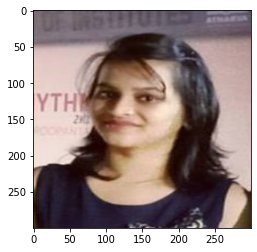

In [10]:
plt.imshow(img_train[20])

# Armazenando todas as Imagens de Teste

In [7]:
for filename in glob.glob(path2 + '/*.jpg'):
    print(filename)
    img2 = io.imread(filename)                
    resized2 = resize(img2, (300,300,3))
    img_test.append(resized2)  

/content/drive/My Drive/Full Dataset/Test/39.jpg
/content/drive/My Drive/Full Dataset/Test/63.jpg
/content/drive/My Drive/Full Dataset/Test/64.jpg
/content/drive/My Drive/Full Dataset/Test/augmented_image_129.jpg
/content/drive/My Drive/Full Dataset/Test/54.jpg
/content/drive/My Drive/Full Dataset/Test/65.jpg
/content/drive/My Drive/Full Dataset/Test/augmented_image_147.jpg
/content/drive/My Drive/Full Dataset/Test/augmented_image_145.jpg
/content/drive/My Drive/Full Dataset/Test/augmented_image_125.jpg
/content/drive/My Drive/Full Dataset/Test/394.jpg
/content/drive/My Drive/Full Dataset/Test/62.jpg
/content/drive/My Drive/Full Dataset/Test/augmented_image_157.jpg
/content/drive/My Drive/Full Dataset/Test/augmented_image_105.jpg
/content/drive/My Drive/Full Dataset/Test/132.jpg
/content/drive/My Drive/Full Dataset/Test/augmented_image_161.jpg
/content/drive/My Drive/Full Dataset/Test/32.jpg
/content/drive/My Drive/Full Dataset/Test/61.jpg
/content/drive/My Drive/Full Dataset/Test/133.

In [8]:
for filename in glob.glob(path2 + '/*.png'):
    print(filename)
    img2 = io.imread(filename)
    resized2 = resize(img2, (300,300,3))
    img_test.append(resized2)  

/content/drive/My Drive/Full Dataset/Test/2591.png
/content/drive/My Drive/Full Dataset/Test/2659.png
/content/drive/My Drive/Full Dataset/Test/2716.png
/content/drive/My Drive/Full Dataset/Test/2458.png
/content/drive/My Drive/Full Dataset/Test/3159.png
/content/drive/My Drive/Full Dataset/Test/3044.png
/content/drive/My Drive/Full Dataset/Test/3838.png
/content/drive/My Drive/Full Dataset/Test/3845.png
/content/drive/My Drive/Full Dataset/Test/4162.png
/content/drive/My Drive/Full Dataset/Test/4558.png
/content/drive/My Drive/Full Dataset/Test/4395.png
/content/drive/My Drive/Full Dataset/Test/4287.png
/content/drive/My Drive/Full Dataset/Test/3958.png
/content/drive/My Drive/Full Dataset/Test/4615.png
/content/drive/My Drive/Full Dataset/Test/1779.png
/content/drive/My Drive/Full Dataset/Test/0372.png
/content/drive/My Drive/Full Dataset/Test/0561.png
/content/drive/My Drive/Full Dataset/Test/0582.png
/content/drive/My Drive/Full Dataset/Test/0643.png
/content/drive/My Drive/Full Da

In [9]:
len(img_test)

140

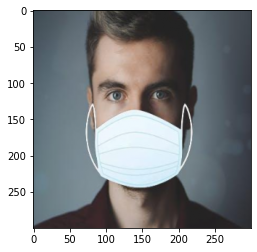

In [14]:
plt.imshow(img_test[139])

# CNN

Total de Imagens = 1400

90% = Treino = 1260

10% = Teste = 140

In [10]:
train_images = np.zeros((1260, 300, 300, 3))
test_images = np.zeros((140, 300, 300, 3))
train_labels = np.zeros((1260, 1))
test_labels = np.zeros((140, 1))

In [16]:
print(train_labels.max())

0.0


In [11]:
id_treino = 0
for i in range(len(img_train)):

    train_images[id_treino,:,:,:] = img_train[i]

    if exttrain[i] == 1:
        train_labels[id_treino] = 1
    else:
        train_labels[id_treino] = 0

    id_treino += 1

In [12]:
id_test = 0
for i in range(len(img_test)):

    test_images[id_test,:,:,:] = img_test[i]

    if exttest[i] == 1:
        test_labels[id_test] = 1
    else:
        test_labels[id_test] = 0
        
    id_test += 1

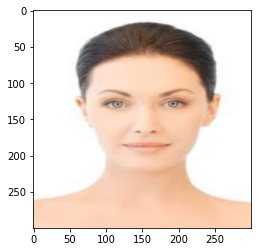

In [19]:
plt.imshow(test_images[1])

In [20]:
#Normalizando os valores do pixels entre 0 e 1
#train_images, test_images = train_images / 255.0, test_images / 255.0

In [21]:
model = models.Sequential()

model.add(layers.Conv2D(32, kernel_size =(3, 3), activation='relu', input_shape = (300, 300, 3))) 
model.add(layers.MaxPooling2D(pool_size = (2, 2)))
model.add(layers.Conv2D(64, kernel_size = (5, 5), activation='relu'))
model.add(layers.MaxPooling2D(pool_size = (2, 2)))
model.add(layers.Conv2D(128, kernel_size = (7, 7), activation='relu'))

model.add(layers.Dropout(0.5)) #novo
model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001))) #adicionado regularizacao
model.add(layers.Dense(2)) #corrigido

In [22]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [15]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 145, 145, 64)      51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 72, 72, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 66, 66, 128)       401536    
_________________________________________________________________
dropout (Dropout)            (None, 66, 66, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 557568)            0

In [23]:
history = model.fit(train_images, train_labels, epochs = 50, validation_data=(test_images, test_labels))

Epoch 1/50
40/40 [==============================] - 6s 159ms/step - loss: 1.2952 - accuracy: 0.7619 - val_loss: 1.1239 - val_accuracy: 0.5000
Epoch 2/50
40/40 [==============================] - 6s 155ms/step - loss: 0.6219 - accuracy: 0.7849 - val_loss: 0.8855 - val_accuracy: 0.5000
Epoch 3/50
40/40 [==============================] - 6s 156ms/step - loss: 0.4697 - accuracy: 0.7929 - val_loss: 0.8424 - val_accuracy: 0.4857
Epoch 4/50
40/40 [==============================] - 6s 157ms/step - loss: 0.4176 - accuracy: 0.8032 - val_loss: 0.8621 - val_accuracy: 0.3071
Epoch 5/50
40/40 [==============================] - 6s 156ms/step - loss: 0.3962 - accuracy: 0.8079 - val_loss: 0.9353 - val_accuracy: 0.5000
Epoch 6/50
40/40 [==============================] - 6s 153ms/step - loss: 0.3838 - accuracy: 0.8056 - val_loss: 0.8471 - val_accuracy: 0.4571
Epoch 7/50
40/40 [==============================] - 6s 154ms/step - loss: 0.3736 - accuracy: 0.8143 - val_loss: 0.8713 - val_accuracy: 0.4500
Epoch 

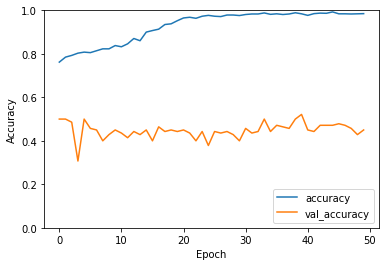

In [24]:
plt.figure()
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

In [25]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print(test_acc)

5/5 - 0s - loss: 3.9447 - accuracy: 0.4500
0.44999998807907104


In [26]:
class_names = ['with mask', 'without mask']

In [29]:
#verificar acuracia por classe
import numpy as np
saidas = model.predict(test_images)
labels_out = np.argmax(saidas, axis=1)
pcts = []
for classe in range(0,2):
    indices = np.where(test_labels == classe)[0]
    corretos = np.where(labels_out[indices] == classe)[0]
    porcentagem = len(corretos) / len(indices)
    pcts.append(porcentagem * 100)
    
print('Porcentagens')
for i in range(0,2):
    print('%s -> %.2f %%' %(class_names[i],pcts[i]))

Porcentagens
with mask -> 57.14 %
without mask -> 32.86 %
